##  1. Linear Regression (OLS)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

# Load dataset
X, y = mglearn.datasets.load_extended_boston()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train Linear Regression
lr = LinearRegression().fit(X_train, y_train)

# Evaluate model
print("Linear Regression - Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Linear Regression - Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Linear Regression - Training set score: 0.95
Linear Regression - Test set score: 0.61


## 2. Ridge Regression (L2 Regularization)

Ridge regression minimizes the following objective:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} w_j^2
$$

Where:  
- $y_i$ is the true target  
- $\hat{y}_i = \mathbf{w} \cdot \mathbf{x}_i + b$ is the prediction  
- $w_j$ are the model weights  
- $\alpha$ is the regularization strength  
- The second term is the **L2 penalty**

---

In [24]:
from sklearn.linear_model import Ridge

# Default alpha = 1.0
ridge = Ridge().fit(X_train, y_train)
print("Ridge (alpha=1.0) - Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge (alpha=1.0) - Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# Stronger regularization
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge (alpha=10) - Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Ridge (alpha=10) - Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

# Weaker regularization
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge (alpha=0.1) - Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Ridge (alpha=0.1) - Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Ridge (alpha=1.0) - Training set score: 0.89
Ridge (alpha=1.0) - Test set score: 0.75
Ridge (alpha=10) - Training set score: 0.79
Ridge (alpha=10) - Test set score: 0.64
Ridge (alpha=0.1) - Training set score: 0.93
Ridge (alpha=0.1) - Test set score: 0.77


In [25]:
alphas = np.logspace(-3, 3, 20)

train_scores = []
test_scores = []


for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))


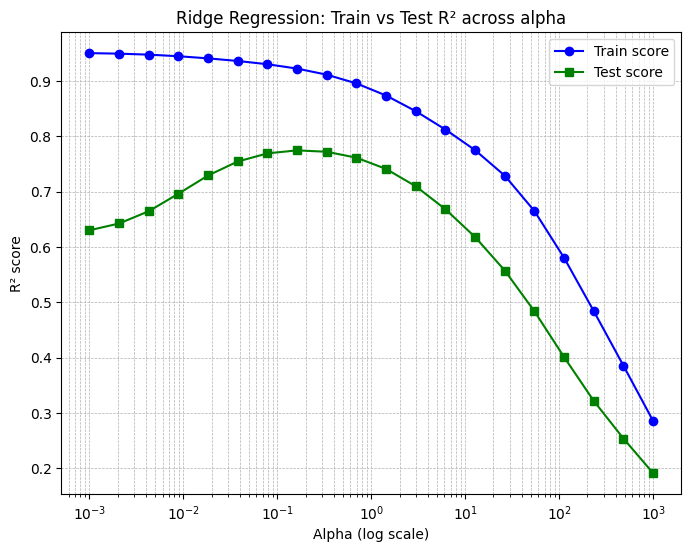

In [26]:
# 📌 Plot train vs test scores
plt.figure(figsize=(8,6))
plt.plot(alphas, train_scores, marker='o', label='Train score', color='blue')
plt.plot(alphas, test_scores, marker='s', label='Test score', color='green')

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² score')
plt.title('Ridge Regression: Train vs Test R² across alpha')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


##  3. Coefficient Comparison Plot

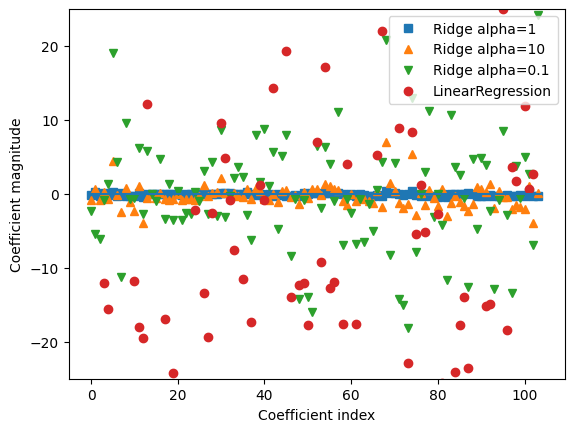

In [27]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()


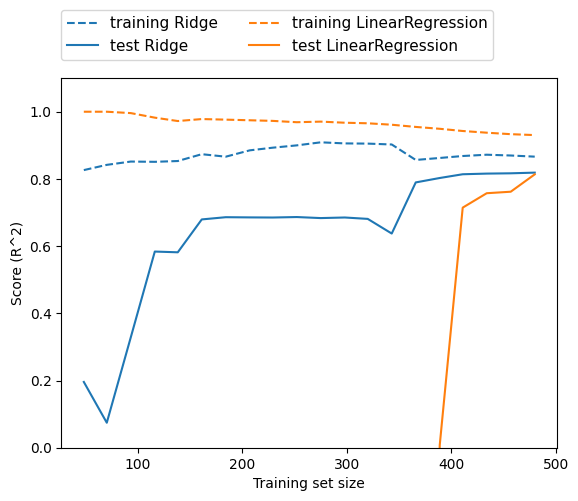

In [28]:
mglearn.plots.plot_ridge_n_samples()


# Lasso Regression
Lasso regression minimizes the following objective:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |w_j|
$$

Where:  
- $|w_j|$ denotes the absolute value of each weight  
- The second term is the **L1 penalty**  
- This encourages **sparse** solutions (some weights become zero)

##  1. Basic Lasso Regression (default alpha = 1.0)

In [29]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.29
Test set score: 0.21
Number of features used: 4


## 2. Lasso with alpha=0.01 and increased max_iter

In [30]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


## 3. Lasso with very small alpha=0.0001 (almost no regularization)

In [31]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))


Training set score: 0.95
Test set score: 0.64
Number of features used: 96


In [35]:
alphas = np.logspace(-3, 3, 20)

train_scores = []
test_scores = []
features = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    train_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    features.append(np.sum(lasso00001.coef_ != 0))

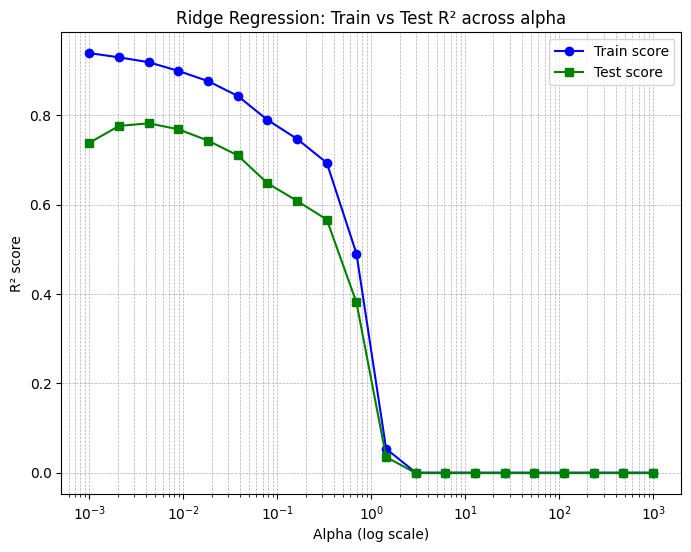

In [33]:
# 📌 Plot train vs test scores
plt.figure(figsize=(8,6))
plt.plot(alphas, train_scores, marker='o', label='Train score', color='blue')
plt.plot(alphas, test_scores, marker='s', label='Test score', color='green')
plt.plot(alphas, test_scores, marker='s', label='Test score', color='green')

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² score')
plt.title('Ridge Regression: Train vs Test R² across alpha')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


##  4. Coefficient Plot (Optional Visualization)

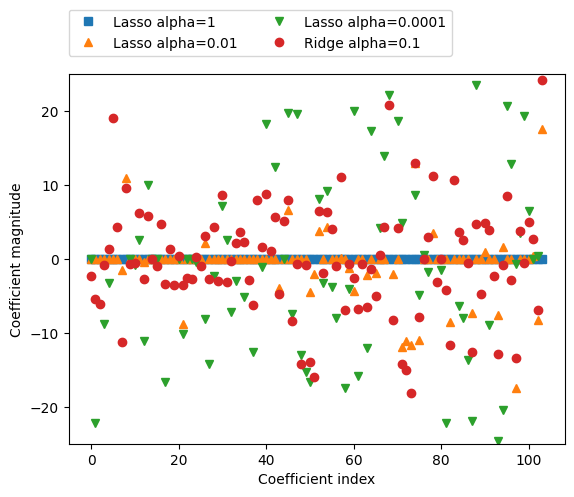

In [34]:
import matplotlib.pyplot as plt

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()
